In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
all_data = pd.read_csv("drug_cons_data.txt")


In [3]:
#Look at variations and correlations of numeric columns
print(all_data.var())
print(all_data.corr())


Nscore    0.996215
Escore    0.994903
Oscore    0.992471
Ascore    0.994888
Cscore    0.995051
Imp       0.910945
SS        0.928720
dtype: float64
          Nscore    Escore    Oscore    Ascore    Cscore       Imp        SS
Nscore  1.000000 -0.431051  0.010177 -0.216964 -0.391088  0.174399  0.079988
Escore -0.431051  1.000000  0.245277  0.157336  0.308024  0.114151  0.210130
Oscore  0.010177  0.245277  1.000000  0.038516 -0.056811  0.277512  0.421709
Ascore -0.216964  0.157336  0.038516  1.000000  0.247482 -0.229690 -0.208061
Cscore -0.391088  0.308024 -0.056811  0.247482  1.000000 -0.335133 -0.229038
Imp     0.174399  0.114151  0.277512 -0.229690 -0.335133  1.000000  0.623120
SS      0.079988  0.210130  0.421709 -0.208061 -0.229038  0.623120  1.000000


In [4]:
#Try random forest for feature selection --------------------------------------------
model = RandomForestClassifier(random_state=1, max_depth=10)

#only use demographics and personality scores to predict
attrs = all_data[['Age','Gender','Education','Country','Nscore','Escore','Oscore',
           'Ascore','Cscore','Imp','SS']].copy()

#create list of all drug names
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']

In [7]:
#convert categorical columns into dummy/indicator variables
attrs2 = pd.get_dummies(attrs)
attrs2.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Imp,SS,Age_18-24,Age_25-34,Age_35-44,...,Education_MA,Education_PhD,Education_UG,Country_AUS,Country_CA,Country_IRL,Country_NZ,Country_Other,Country_UK,Country_USA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [8]:
#create dictionary that keeps track of how many times an attribute is in the top x important features
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [9]:
#for each drug, create a random forest model that ranks features importances
#increment importance_counts for features that are in the top 10 for importance
for drug in drugs:
    model.fit(attrs2, all_data[drug])
    features = attrs2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        


{'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19,
 'Country_UK': 16,
 'Age_18-24': 15,
 'Country_USA': 14,
 'Gender_Female': 2,
 'Gender_Male': 2,
 'Education_UG': 2,
 'Age_25-34': 1,
 'Education_Incomplete': 1,
 'Education_L16': 1,
 'Education_L17': 1,
 'Country_AUS': 1,
 'Country_Other': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Education_Diploma': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0}

In [10]:
#reset importance_counts to 0 for all 
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}
#do the same thing but this time only incrementing if in the top 5 for importance
for drug in drugs:
    model.fit(attrs2, all_data[drug])
    features = attrs2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-5:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        

        
        

{'Oscore': 19,
 'Cscore': 19,
 'Nscore': 15,
 'Ascore': 15,
 'Escore': 12,
 'SS': 11,
 'Country_UK': 2,
 'Age_18-24': 1,
 'Country_USA': 1,
 'Imp': 0,
 'Age_25-34': 0,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Gender_Female': 0,
 'Gender_Male': 0,
 'Education_Diploma': 0,
 'Education_Incomplete': 0,
 'Education_L16': 0,
 'Education_L17': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Education_UG': 0,
 'Country_AUS': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Country_Other': 0}

In [11]:
#example of graphing top 20 feature importances for heroin
model.fit(attrs2, all_data['Heroin'])
features = attrs2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:] #top 10 features

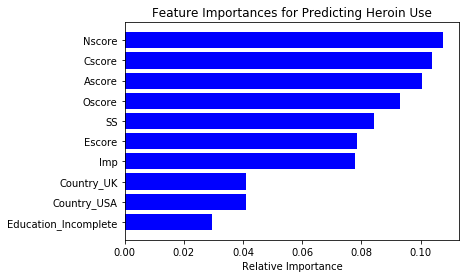

In [12]:
plt.title('Feature Importances for Predicting Heroin Use')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
